Problem Statement: Write  a colab  numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation 

In [5]:
import numpy as np
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# input_arch = [
#     {'input_dim' : 2, 'output_dim': 1, 'activation':'relu'},
#     {'input_dim' : 2, 'output_dim': , 'activation':'relu'},
#     {'input_dim' : 2, 'output_dim': , 'activation':'relu'}
#     ]

# Define Classes

## Linear Layer

In [6]:
class Linear:
  def __init__(self, input_dim, output_dim):
    self.weights = np.random.randn(input_dim, output_dim)*np.sqrt(2./(input_dim))
    self.bias = np.zeros(output_dim)

  def __call__(self, input):
    self.input = input
    return np.einsum('ij, jk-> ik', input, self.weights) + self.bias

  def backward(self, gradient):
    self.weights_gradient = np.einsum('ij, jk-> ik', self.input.T, gradient)
    self.bias_gradient = gradient.sum(axis = 0)
    self.input_gradient = np.einsum('ij, jk-> ik', gradient, self.weights.T)
    return self.input_gradient

  def update(self, alpha):
    self.weights = self.weights - (alpha*self.weights_gradient)
    self.bias = self.bias - (alpha*self.bias_gradient)

## Loss Class

In [16]:
class MSSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred)** 2).mean()
  
  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

## ReLU Class

In [8]:
class ReLU:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0 ) * output_gradient
    return self.input_gradient

## Model Class

In [25]:
class Model:
  def __init__(self, input_dim, output_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = ReLU()
    self.linear2 = Linear(num_hidden, num_hidden)
    self.relu2 = ReLU()
    self.linear3 = Linear(num_hidden, output_dim)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)

    return l3

  def backward(self, output_gradient):
    l3_gradient = self.linear3.backward(output_gradient)
    r2_gradient = self.relu2.backward(l3_gradient)
    l2_gradient = self.linear2.backward(r2_gradient)
    r1_gradient = self.relu1.backward(l2_gradient)
    l1_gradient = self.linear1.backward(r1_gradient)
    return l1_gradient

  def update(self, alpha):
    self.linear3.update(alpha)
    self.linear2.update(alpha)
    self.linear1.update(alpha)




# Call Model

In [10]:
n = 500
dim = 3
epochs = 50
alpha = 0.01


# 3 variables based non-linear equation
#y = x^3*w + x^2*w + x*w + b

input = np.random.uniform(-1, 1, (n, dim))
print('Input shape =', input.shape)


Input shape = (500, 3)


In [11]:
weights_true = np.array([[2, -3, 1]]).T
bias_true = np.array([8])
print('Weights shape =', weights_true.shape)
print('Bias shape =', bias_true.shape)

y_true = np.einsum('ij, jk -> ik', (input**3),  weights_true) + np.einsum('ij, jk -> ik', (input**2),  weights_true) + np.einsum('ij, jk -> ik', input, weights_true) + bias_true
print('Function output shape =', y_true.shape)

Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (500, 1)


In [28]:
input_dim = dim
output_dim = 1
num_hidden = 16


loss_ = []
def fit(input, y_true, model, loss, alpha, epochs):
  for epoch in range(epochs):
    y_pred = model(input)
    loss_value = loss(y_pred, y_true)
    print("Epoch - ", epoch, " Loss Value - ", loss_value)
    loss_gradient = loss.backward()
    model.backward(loss_gradient)
    model.update(alpha)
    loss_.append(loss_value)
  return loss_

        

In [29]:
loss = MSSE()
model = Model(input_dim, output_dim, num_hidden)  
loss_ = fit(input, y_true, model, loss, alpha, epochs)

Epoch -  0  Loss Value -  82.32440515134284
Epoch -  1  Loss Value -  67.59418881516523
Epoch -  2  Loss Value -  55.178472629590686
Epoch -  3  Loss Value -  42.10284847488193
Epoch -  4  Loss Value -  28.688289104530508
Epoch -  5  Loss Value -  17.60943752716941
Epoch -  6  Loss Value -  11.361345100804925
Epoch -  7  Loss Value -  8.816044642057333
Epoch -  8  Loss Value -  7.454583420272315
Epoch -  9  Loss Value -  6.456973416467107
Epoch -  10  Loss Value -  5.672084945536766
Epoch -  11  Loss Value -  5.0479410211315106
Epoch -  12  Loss Value -  4.550378690660498
Epoch -  13  Loss Value -  4.155835462017276
Epoch -  14  Loss Value -  3.829687166383706
Epoch -  15  Loss Value -  3.558307495565095
Epoch -  16  Loss Value -  3.3289001006973593
Epoch -  17  Loss Value -  3.133508587148449
Epoch -  18  Loss Value -  2.9666173578415105
Epoch -  19  Loss Value -  2.8235727040434293
Epoch -  20  Loss Value -  2.6971365918173356
Epoch -  21  Loss Value -  2.585166784851987
Epoch -  22 

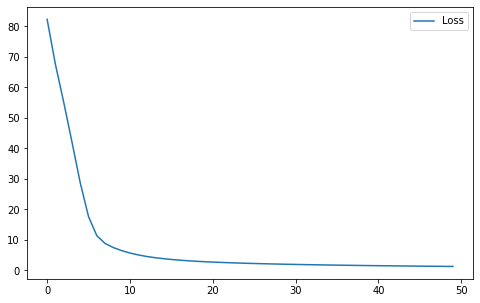

In [30]:
# Plot epoch vs loss

plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_, label='Loss')
plt.legend()

Updating weights and biasesuisng backpropagat5ion to minimize the loss from the epochs above

In [31]:
loss = MSSE()
model = Model(input_dim, output_dim, num_hidden)


y_pred = model(input)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(alpha)
y_pred = model(input)

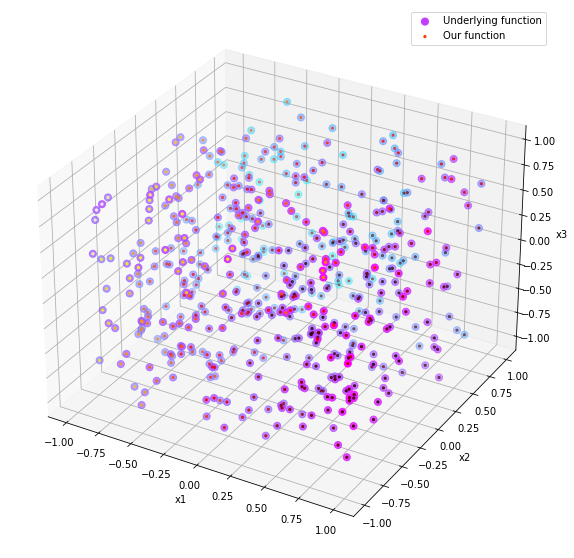

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(input[:, 0], input[:, 1], input[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
#fig.colorbar(sc)
sc = ax.scatter(input[:, 0], input[:, 1], input[:, 2], c=y_pred, cmap='hot', label='Our function', marker='.')
#fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.legend()
plt.show()